### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
training_set = dataset_train.iloc[:, 1:4].values  # choosing Open high and Low
training_set

array([[325.25, 332.83, 324.97],
       [331.27, 333.87, 329.08],
       [329.83, 330.75, 326.89],
       ...,
       [793.7 , 794.23, 783.2 ],
       [783.33, 785.93, 778.92],
       [782.75, 782.78, 770.41]])

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368, 0.09640129, 0.09044931],
       [0.09701243, 0.09834351, 0.09823458],
       [0.09433366, 0.09251685, 0.09408623],
       ...,
       [0.95725128, 0.95807422, 0.95844067],
       [0.93796041, 0.94257381, 0.95033338],
       [0.93688146, 0.93669113, 0.93421352]])

### Creating a data structure with 60 timesteps and 1 output

In [6]:
X_train = []
y_train = []
for i in range(60, 1256):
    X_train.append(training_set_scaled[i-60:i, 0:3])
    y_train.append(training_set_scaled[i, 0:3])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [9]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 3)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [14]:
regressor.add(Dense(units = 3))

### Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [16]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0465
Epoch 2/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0101
Epoch 3/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0087
Epoch 4/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0082
Epoch 5/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0096
Epoch 6/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0079
Epoch 7/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0072
Epoch 8/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0071
Epoch 9/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0068
Epoch 10/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0059
Epoch 11/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0056
Epoch 12/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0061
Epoch 13/100


38/38 [==============================] - 4s 109ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0014


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
dataset_test = pd.read_csv(r'Google_Stock_Price_Test.csv')
real_stock_price  = dataset_test.iloc[:, 1:4].values

### Getting the predicted stock price of 2017

In [18]:
dataset_total = pd.concat([dataset_train[['Open','High','Low']], dataset_test[['Open','High','Low']]])
dataset_total

,Open,High,Low
0,325.25,332.83,324.97
1,331.27,333.87,329.08
2,329.83,330.75,326.89
3,328.34,328.77,323.68
4,322.04,322.29,309.46
...,...,...,...
15,829.62,835.77,825.06
16,837.81,838.00,827.01
17,834.71,841.95,820.44
18,814.66,815.84,799.80


In [19]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,3)
inputs = sc.transform(inputs)

In [20]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0:3])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

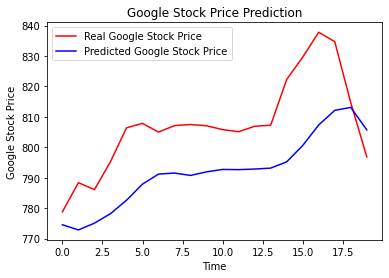

In [21]:
plt.plot(real_stock_price[:,0], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:,0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

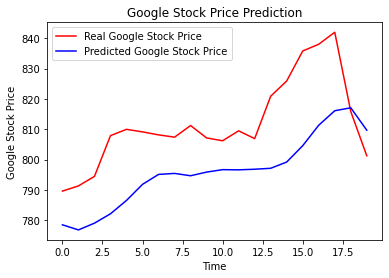

In [22]:
plt.plot(real_stock_price[:,1], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:,1], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

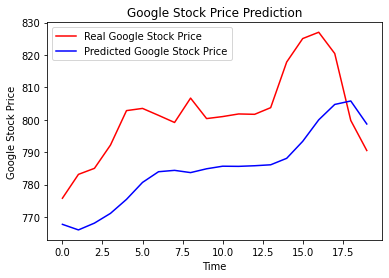

In [41]:
plt.plot(real_stock_price[:,2], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:,2], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()